# Hand load evaluation on truss element

In [58]:
%reset -f
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym




Define node points with xy coordinate and the distance between points

In [60]:
#Define all the nodes
nodes = {   
    "P1" : np.array([0,0]),
    "P2" : np.array([-24,31]),
    "P3" : np.array([18.69,119.5]),
    "P4" : np.array([-24,135.25]),
    "P5" : np.array([20,165]),
    "P6" : np.array([-24,185.23]),
    "P7" : np.array([-24,225.53]),
    "P8" : np.array([40.40,-2.88])
 }

#Calculate distance between nodes and unit vector
distances = {}
versors ={}

for name1, coordinate1 in nodes.items():
    for name2, coordinate2 in nodes.items():
        if name1 != name2:
            distance_name = f"{name1}{name2}"  # Naming distances
            versor_name = f"n{name1}{name2}"   # Naming versors

            dist = np.linalg.norm(coordinate1 - coordinate2)
            distances[distance_name] = dist

            versors[versor_name] = (coordinate1-coordinate2)/dist
            
#To acess to the variable use this notation
print(distances["P1P2"])
print(versors["nP1P2"])

39.20459156782532
[ 0.61217319 -0.79072371]


Plot the brake pedal

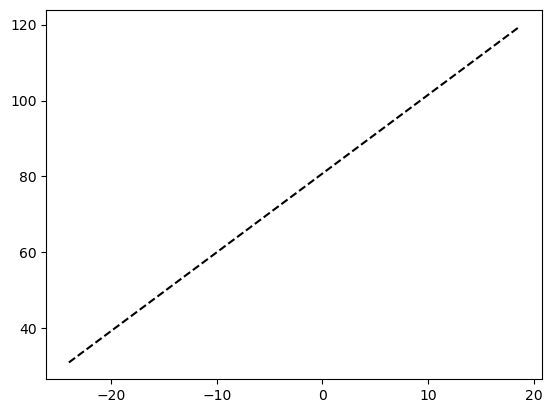

In [106]:
def points_line(point1, point2):
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k--')


points_line(nodes["P2"], nodes["P3"])

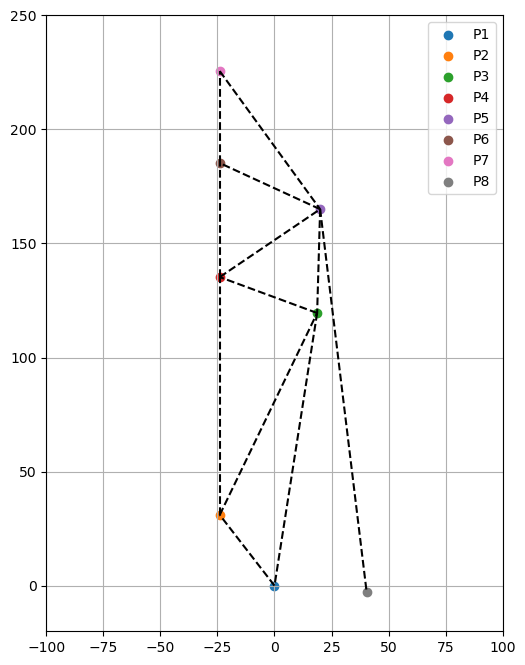

In [112]:
plt.figure(figsize=(8,8))
for name,coordinate in nodes.items():
    plt.scatter(coordinate[0],coordinate[1],label = name)

points_line(nodes["P1"], nodes["P2"])
points_line(nodes["P2"], nodes["P3"])
points_line(nodes["P2"], nodes["P4"])
points_line(nodes["P3"], nodes["P4"])
points_line(nodes["P4"], nodes["P5"])
points_line(nodes["P4"], nodes["P6"])
points_line(nodes["P5"], nodes["P6"])
points_line(nodes["P6"], nodes["P7"])
points_line(nodes["P7"], nodes["P5"])
points_line(nodes["P5"], nodes["P3"])
points_line(nodes["P3"], nodes["P1"])
points_line(nodes["P5"], nodes["P8"])



plt.legend()
plt.xlim(-100, 100)
plt.ylim(-20,250)
plt.grid(1)
plt.gca().set_aspect('equal', adjustable='box')

In [85]:
nodes["P2"][0]

-24

In [128]:
#Define loads and boundary
# Define symbolic variables for reaction forces
R1_y, R1_x, R8_x, R8_y = sym.symbols('R1_y R1_x R8_x R8y')

# Define symbolic variables for each component at each node
N1x, N1y = sym.symbols('N1x N1y')
N2x, N2y = sym.symbols('N2x N2y')
N3x, N3y = sym.symbols('N3x N3y')
N4x, N4y = sym.symbols('N4x N4y')
N5x, N5y = sym.symbols('N5x N5y')
N6x, N6y = sym.symbols('N6x N6y')
N7x, N7y = sym.symbols('N7x N7y')
N8x, N8y = sym.symbols('N8x N8y')
N9x, N9y = sym.symbols('N9x N9y')
N10x, N10y = sym.symbols('N10x N10y')
N11x, N11y = sym.symbols('N11x N11y')
N12x, N12y = sym.symbols('N12x N12y')
N13x, N13y = sym.symbols('N13x N13y')

Rax, Ray = sym.symbols('Rax Ray')
Rbx, Rby = sym.symbols('Rbx Rby')

# Define a dictionary for truss forces at each node
truss_forces = {
    "N1": sym.Matrix([N1x, N1y]),
    "N2": sym.Matrix([N2x, N2y]),
    "N3": sym.Matrix([N3x, N3y]),
    "N4": sym.Matrix([N4x, N4y]),
    "N5": sym.Matrix([N5x, N5y]),
    "N6": sym.Matrix([N6x, N6y]),
    "N7": sym.Matrix([N7x, N7y]),
    "N8": sym.Matrix([N8x, N8y]),
    "N9": sym.Matrix([N9x, N9y]),
    "N10": sym.Matrix([N10x, N10y]),
    "N11": sym.Matrix([N11x, N11y]),
    "N12": sym.Matrix([N12x, N12y]),
    "N13": sym.Matrix([N13x, N13y]),

    "RA" : sym.Matrix([Rax,Ray]),
    "RB" : sym.Matrix([Rbx,Rby]),

}



eq1 = truss_forces["N1"] + truss_forces["N11"]
print(eq1)

forces_balance = {
    "P1": np.array([0, -100]),  # Force applied downwards at P1
    "P2": np.array([0, 0]),     # No force applied at P2
    "P3": np.array([0, 0]),     # No force applied at P3
    "P4": np.array([0, 0]),     # No force applied at P4
    "P5": np.array([0, -200]),  # Force applied downwards at P5
    "P6": np.array([0, 0]),     # No force applied at P6
    "P7": np.array([0, 0]),     # No force applied at P7
    "P8": np.array([0, -150])   # Force applied downwards at P8
}


sym.Matrix([1,2])




Matrix([[N11x + N1x], [N11y + N1y]])


Matrix([
[1],
[2]])